# These are some plots where h was a small value = 5 x 10^-15

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package




Follows the calculation in https://git.ligo.org/lscsoft/bilby/-/blob/master/bilby/core/result.py and https://git.ligo.org/lscsoft/bilby/-/blob/master/bilby/core/result.py

In [22]:
import json
import pandas as pd 
import numpy as np
def get_injection_credible_level(path):

   
    #Define the parameters 
    parameters = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h"]

    #Load a file 
    f = open(path)
    data = json.load(f)
    f.close()
    #Make it a dataframe. 
    df_posterior = pd.DataFrame(data["posterior"]["content"]) 


    #Setup
    weights = np.ones(len(df_posterior))
    injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,5e-15]

    #Select for that variable
    #parameter = parameters[idx]
    #injection = injection_parameters[idx]


    credible_levels = {parameters[idx]: sum(np.array(df_posterior[parameters[idx]].values <injection_parameters[idx]) * weights) / (sum(weights)) for idx in range(len(parameters))}

    return credible_levels
           


def check_behaviour(path):

    #Load a file 
    f = open(path)
    data = json.load(f)
    f.close()
    #Make it a dataframe. 
    df_posterior = pd.DataFrame(data["posterior"]["content"]) 


    

    if (2.2 <= df_posterior['psi_gw'].median() <= 2.7) or (0.9 <= df_posterior['alpha_gw'].median() <= 1.1):
        return_code = 0
    else:
        return_code=1


    return return_code



In [23]:
list_of_files = sorted(glob.glob("../data/nested_sampling/data_for_manuscript/small_h_batch/*"))

In [24]:

#Some files are rubbish and are miles away due to poor convergence 

#Lets drop these and just get the good files 

list_of_good_files = []
for i,f in enumerate(list_of_files):
    print(i)
    code =  check_behaviour(f)

    if code ==0:
        list_of_good_files.extend([f])



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [25]:
len(list_of_good_files)

85

In [27]:
import glob
credible_levels = list()
for i in range(len(list_of_good_files)):
    cc = get_injection_credible_level(list_of_good_files[i])
    credible_levels.append(cc)

In [28]:
#Make it a df 
credible_levels = pd.DataFrame(credible_levels)
credible_levels

,omega_gw,phi0_gw,psi_gw,iota_gw,delta_gw,alpha_gw,h
0,0.776126,0.340865,0.998513,0.859967,0.999851,0.923294,0.905753
1,0.047071,0.058573,0.173802,0.818317,0.840256,0.153994,0.334611
2,0.238745,0.330908,0.524784,0.693800,0.941640,0.373352,0.754282
3,0.005706,0.120930,0.959087,0.622599,0.994294,0.882689,0.415252
4,0.100572,0.193786,0.519624,0.768193,0.643704,0.878986,0.355070
...,...,...,...,...,...,...,...
80,0.204693,0.089331,0.127391,0.961152,0.156971,0.231710,0.787813
81,0.016595,0.038926,0.055521,0.815202,0.422250,0.113501,0.748002
82,0.550275,0.548392,0.587451,0.888000,0.975686,0.899451,0.860235
83,0.053628,0.066397,0.227070,0.773569,0.192594,0.127261,0.672271


In [29]:
labels = ['$\Omega$','$\Phi_0$','$\psi$','$\iota$', '$\delta$','$\\alpha$','h']

for ii,key in enumerate(credible_levels):
    print(ii,key,labels[ii])

0 omega_gw $\Omega$
1 phi0_gw $\Phi_0$
2 psi_gw $\psi$
3 iota_gw $\iota$
4 delta_gw $\delta$
5 alpha_gw $\alpha$
6 h h


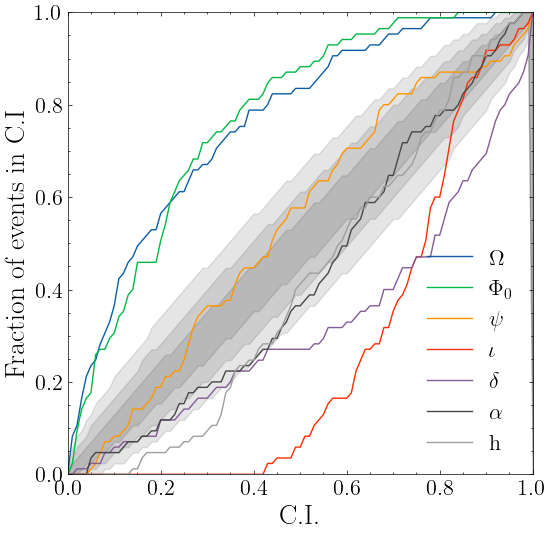

In [30]:

import matplotlib.pyplot as plt 
import scienceplots
import scipy


plt.style.use('science')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


#Setup
x_values = np.linspace(0, 1, 101)
N = len(credible_levels)


#Plot the sigma bounds
confidence_interval = [0.68, 0.95, 0.997]
confidence_interval_alpha = 0.1
confidence_interval_alpha = [confidence_interval_alpha] * len(confidence_interval)
for ci, alpha in zip(confidence_interval, confidence_interval_alpha):
    edge_of_bound = (1. - ci) / 2.
    lower = scipy.stats.binom.ppf(1 - edge_of_bound, N, x_values) / N
    upper = scipy.stats.binom.ppf(edge_of_bound, N, x_values) / N
        
    # The binomial point percent function doesn't always return 0 @ 0,
    # so set those bounds explicitly to be sure
    lower[0] = 0
    upper[0] = 0
    ax.fill_between(x_values, lower, upper, alpha=alpha, color='k')


pvalues = []
#["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h"]
labels = ['$\Omega$','$\Phi_0$','$\psi$','$\iota$', '$\delta$','$\\alpha$','h']

for ii, key in enumerate(credible_levels):
    pp = np.array([sum(credible_levels[key].values < xx) /
                       len(credible_levels) for xx in x_values])
    pvalue = scipy.stats.kstest(credible_levels[key], 'uniform').pvalue
    pvalues.append(pvalue)
        
    ax.plot(x_values, pp,label = labels[ii])

   # print(ii,key,pp)







fs = 20

#pp = np.array([sum(credible_levels[0].values < xx) /len(credible_levels) for xx in x_values])






#ax.plot(x_values,x_values,c='C2',linestyle = '--')
ax.legend(fontsize=fs-4)
ax.set_xlim(0,1)
ax.set_ylim(0,1)




   

ax.set_xlabel(r'C.I.', fontsize=fs)
ax.set_ylabel(r'Fraction of events in C.I', fontsize=fs)
ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)





#savefig = 'pp_plot_new_h_5_e-15'
    # ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    # plt.setp(ax.get_yticklabels()[0], visible=False)   #no 0th label to prevent overlap  
#plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)










In [250]:
pvalues

[0.007411540899881184,
 0.015616509561027666,
 5.658070103306277e-05,
 2.3309016429520656e-13,
 9.675428828302317e-09]